introdution to regression with neural networks in tensorflow

There are many definitions for a regression problem but in our case we are going to simplify it, predicting a numerical variable based on some other sombination of other variables

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


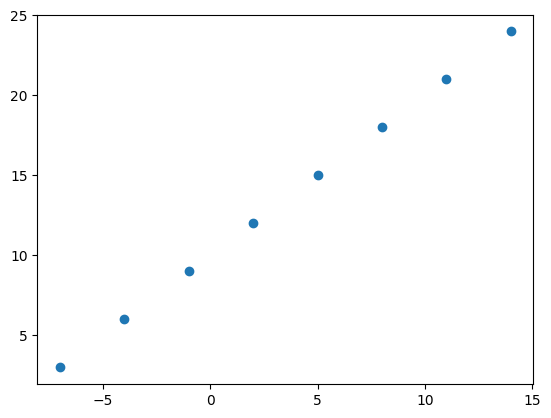

In [2]:
# creating some data for viewing and fitting
import numpy as np
import matplotlib.pyplot as plt
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

plt.scatter(X,Y)

In [3]:
# creating a demo tensor for housing price prediction problem

house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = Y.shape
input_shape,output_shape

((8,), (8,))

basic steps for creating the model with tensorflow

1. Creating a model with tf, defining the input and output layer and defining the hidden layers
2. Compile the mode -  defing the loss function which in turn tells our model how wrong it is and then defining the optimizer telling our model how to imporve patterns its learning and evaluatio metrics which can be used to evaluate the performance of the model
3. Fitting the model - letting the model figure out the patterns between the data


In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compiling the model

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# fitting the model
model.fit(tf.expand_dims(X,axis = -1),Y,epochs = 1300)

Epoch 1/1300
1/1 [==============================] - 1s 673ms/step - loss: 10.6724 - mae: 10.6724
Epoch 2/1300
1/1 [==============================] - 0s 16ms/step - loss: 10.5399 - mae: 10.5399
Epoch 3/1300
1/1 [==============================] - 0s 14ms/step - loss: 10.4074 - mae: 10.4074
Epoch 4/1300
1/1 [==============================] - 0s 16ms/step - loss: 10.2749 - mae: 10.2749
Epoch 5/1300
1/1 [==============================] - 0s 14ms/step - loss: 10.1424 - mae: 10.1424
Epoch 6/1300
1/1 [==============================] - 0s 12ms/step - loss: 10.0099 - mae: 10.0099
Epoch 7/1300
1/1 [==============================] - 0s 14ms/step - loss: 9.8774 - mae: 9.8774
Epoch 8/1300
1/1 [==============================] - 0s 13ms/step - loss: 9.7449 - mae: 9.7449
Epoch 9/1300
1/1 [==============================] - 0s 16ms/step - loss: 9.6124 - mae: 9.6124
Epoch 10/1300
1/1 [==============================] - 0s 17ms/step - loss: 9.4799 - mae: 9.4799
Epoch 11/1300
1/1 [===========================

In [6]:
model.predict([-7.0])

1/1 [==============================] - 0s 330ms/step


array([[2.5699015]], dtype=float32)

# working on improving the model

# we can improve the model by changing and altering the steps used to create the model
1. creating the model: whil creating the model we can add more layers in the model, increase the number of hidden units in each hidden layer, allso modify the activation function of each layer

2. compiling the model: change the optimization function or the learning rate of the optimization function

3. fitting the model: fit it for more epochs and leave it training for longer or increase the data size for training

In [7]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = "relu"),
    # tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
 ])

model1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                metrics = ["mae"])
 

model1.fit(tf.expand_dims(X,axis = -1),Y,epochs = 100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 12.1865 - mae: 12.1865
Epoch 2/100
1/1 [==============================] - 0s 29ms/step - loss: 12.1683 - mae: 12.1683
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 12.1502 - mae: 12.1502
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.1321 - mae: 12.1321
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 12.1139 - mae: 12.1139
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 12.0958 - mae: 12.0958
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 12.0777 - mae: 12.0777
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 12.0595 - mae: 12.0595
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 12.0414 - mae: 12.0414
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 12.0233 - mae: 12.0233
Epoch 11/100
1/1 [==============================] -

In [8]:
 X = tf.range(-100,100,4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [9]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

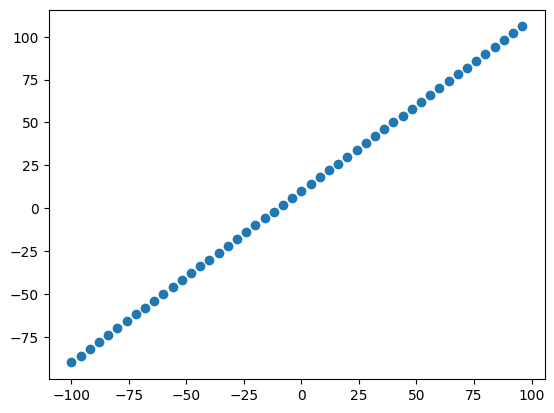

In [10]:
# visualising the data
plt.scatter(X,y)

training in the form of three sets....


1. ttaining set: this is trhe data the model uses for training and this is typicallyu 70-80% of the entire data available
2. Validation set: this is the validation data available for the model to fine tune itself. this enables the model to check how it is performing based on the data which has been provided for training
3. Testing set: the model gets evaluated on this data to see what it has learnt and how it performs on the unseen data



In [11]:
len(X)

50

In [12]:
Xtrain = X[:40]
Ytrain = y[:40]
Xtest = X[40:]
Ytest = y[40:]
len(Xtrain),len(Ytrain),len(Xtest),len(Ytest)

(40, 40, 10, 10)

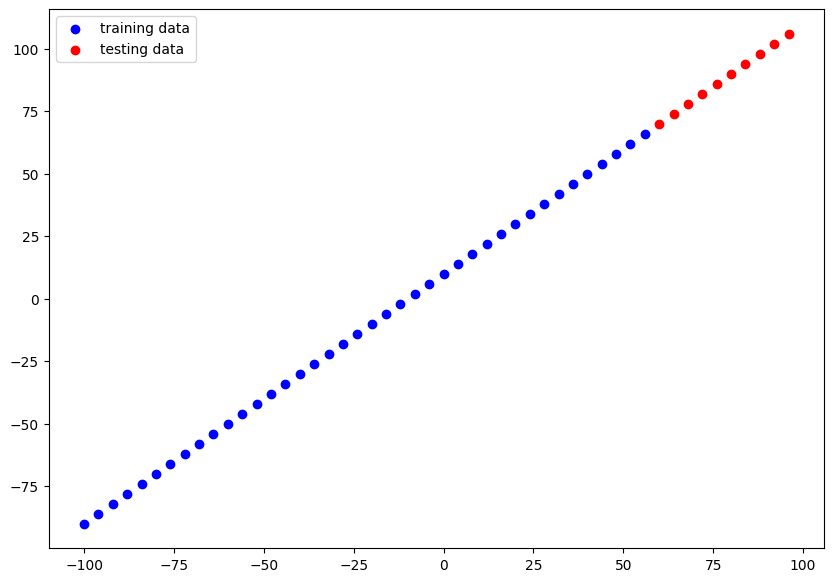

In [13]:
plt.figure(figsize = (10,7))
plt.scatter(Xtrain,Ytrain,c = "b",label = "training data")
plt.scatter(Xtest,Ytest,c = "r",label = "testing data")
plt.legend();

In [14]:
# creating a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(lr = 0.001),
              metrics = "mae")

# model.fit(tf.expand_dims(Xtrain,axis = -1),Ytrain,epochs = 50)

In [15]:
# creating a model that builds automaticaaly by defining the input shape 
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape = [1])
])

model.compile(loss="mae",
              optimizer = "sgd",
              metrics = "mae")

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


total params is the total number of paramteres in the model
trainable prams are the parameters which can be updated and modified during the training phase
non trainabel params are the ones which cannot be updated during the training

In [16]:
model.fit(tf.expand_dims(Xtrain,axis = -1),Ytrain,epochs = 50,verbose = 1)

Epoch 1/50
2/2 [==============================] - 2s 46ms/step - loss: 30.2777 - mae: 30.2777
Epoch 2/50
2/2 [==============================] - 0s 20ms/step - loss: 9.6673 - mae: 9.6673
Epoch 3/50
2/2 [==============================] - 0s 23ms/step - loss: 10.9298 - mae: 10.9298
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 9.3961 - mae: 9.3961
Epoch 5/50
2/2 [==============================] - 0s 14ms/step - loss: 10.2808 - mae: 10.2808
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 9.5288 - mae: 9.5288
Epoch 7/50
2/2 [==============================] - 0s 11ms/step - loss: 8.6518 - mae: 8.6518
Epoch 8/50
2/2 [==============================] - 0s 19ms/step - loss: 9.0444 - mae: 9.0444
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 18.9684 - mae: 18.9684
Epoch 10/50
2/2 [==============================] - 0s 14ms/step - loss: 10.2299 - mae: 10.2299
Epoch 11/50
2/2 [==============================] - 0s 29ms/step - los

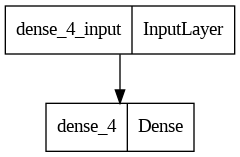

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model = model)

In [18]:
ypred = model.predict(Xtest)
ypred

1/1 [==============================] - 0s 277ms/step


array([[58.025654],
       [61.850197],
       [65.67474 ],
       [69.49928 ],
       [73.32383 ],
       [77.14837 ],
       [80.972916],
       [84.797455],
       [88.622   ],
       [92.44655 ]], dtype=float32)

In [19]:
Ytest

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [20]:
def plot_predictions(train_data = Xtrain,
                     train_labels = Ytrain,
                     test_data = Xtest,
                     test_labels = Ytest,
                     predictions = ypred):
  """PLots the training data, test data and compares predictions to the ground truth label"""
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels,c = "b",label="training Data")
  plt.scatter(test_data,test_labels,c = "g",label = "testing data")
  plt.scatter(test_data,predictions,c = "r",label = "predcitions")
  plt.legend();

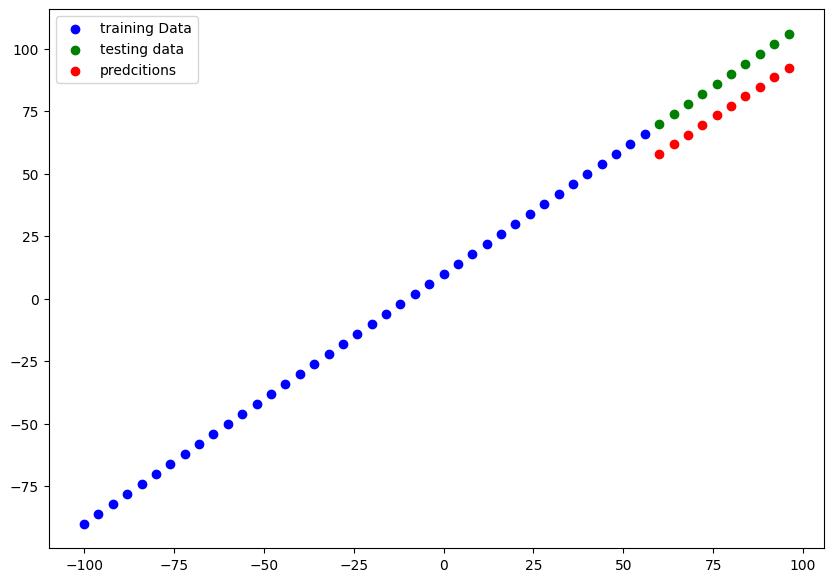

In [21]:
plot_predictions()

In [22]:
model.evaluate(Xtest,Ytest)

1/1 [==============================] - 1s 591ms/step - loss: 12.7639 - mae: 12.7639


[12.763899803161621, 12.763899803161621]

In [23]:
mae = tf.keras.losses.mae(Ytest,ypred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([29.974346, 26.149805, 22.325256, 18.500717, 15.340937, 12.910978,
       11.210834, 10.240509, 10.      , 10.489309], dtype=float32)>

In [24]:
Ytest

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [25]:
ypred = tf.squeeze(tf.constant(ypred))
ypred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.025654, 61.850197, 65.67474 , 69.49928 , 73.32383 , 77.14837 ,
       80.972916, 84.797455, 88.622   , 92.44655 ], dtype=float32)>

In [26]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
])

model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "mae")

model1.fit(tf.expand_dims(Xtrain,axis = -1),Ytrain,epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 16ms/step - loss: 38.7261 - mae: 38.7261
Epoch 2/100
2/2 [==============================] - 0s 17ms/step - loss: 38.6407 - mae: 38.6407
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 38.5585 - mae: 38.5585
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 38.4747 - mae: 38.4747
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 38.3926 - mae: 38.3926
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 38.3103 - mae: 38.3103
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 38.2267 - mae: 38.2267
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 38.1403 - mae: 38.1403
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 38.0596 - mae: 38.0596
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 37.9788 - mae: 37.9788
Epoch 11/100
2/2 [==============================] 

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "mae")

model2.fit(tf.expand_dims(Xtrain,axis = -1),Ytrain,epochs = 100)

Epoch 1/100
2/2 [==============================] - 3s 9ms/step - loss: 25.2291 - mae: 25.2291
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 24.7909 - mae: 24.7909
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 24.3628 - mae: 24.3628
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 23.9256 - mae: 23.9256
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 23.4965 - mae: 23.4965
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 23.0637 - mae: 23.0637
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 22.6183 - mae: 22.6183
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 22.1586 - mae: 22.1586
Epoch 9/100
2/2 [==============================] - 0s 15ms/step - loss: 21.7262 - mae: 21.7262
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 21.2912 - mae: 21.2912
Epoch 11/100
2/2 [==============================] - 

In [28]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = "mae")

model3.fit(tf.expand_dims(Xtrain,axis = -1),Ytrain,epochs = 200)

Epoch 1/200
2/2 [==============================] - 5s 39ms/step - loss: 98.0061 - mae: 98.0061
Epoch 2/200
2/2 [==============================] - 0s 80ms/step - loss: 97.3627 - mae: 97.3627
Epoch 3/200
2/2 [==============================] - 0s 60ms/step - loss: 96.7436 - mae: 96.7436
Epoch 4/200
2/2 [==============================] - 0s 49ms/step - loss: 96.1173 - mae: 96.1173
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 95.5054 - mae: 95.5054
Epoch 6/200
2/2 [==============================] - 0s 39ms/step - loss: 94.8906 - mae: 94.8906
Epoch 7/200
2/2 [==============================] - 0s 38ms/step - loss: 94.2731 - mae: 94.2731
Epoch 8/200
2/2 [==============================] - 0s 53ms/step - loss: 93.6350 - mae: 93.6350
Epoch 9/200
2/2 [==============================] - 0s 26ms/step - loss: 93.0448 - mae: 93.0448
Epoch 10/200
2/2 [==============================] - 0s 18ms/step - loss: 92.4503 - mae: 92.4503
Epoch 11/200
2/2 [==============================]

In [29]:
# saving a model in tensorflow 
model2.save("best_model")

In [30]:
model2.save('model.h5')

In [31]:
load_model = tf.keras.models.load_model('/content/best_model')

In [32]:
load_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [34]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [35]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
# converting categorical variables into dummy variables using one hot encoding

insurance_one_hot = pd.get_dummies(insurance)

In [37]:
X = insurance_one_hot.drop("charges",axis = 1)
Y = insurance_one_hot["charges"]

In [38]:
X.head(),Y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [39]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state = 42)
len(Xtrain),len(Xtest),len(X)

(1070, 268, 1338)

In [40]:
tf.random.set_seed(42)

modelnew = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "relu")
])

modelnew.compile(loss = tf.keras.losses.mae,
                 optimizer  = tf.keras.optimizers.Adam(lr = 0.01),
                 metrics = ["mae"])
modelnew.fit(Xtrain,Ytrain,epochs = 150)

Epoch 1/150
34/34 [==============================] - 1s 2ms/step - loss: 13346.0898 - mae: 13346.0898
Epoch 2/150
34/34 [==============================] - 0s 2ms/step - loss: 13346.0889 - mae: 13346.0889
Epoch 3/150
34/34 [==============================] - 0s 2ms/step - loss: 13346.0908 - mae: 13346.0908
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mae: 13346.0898
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mae: 13346.0898
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mae: 13346.0898
Epoch 7/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0898 - mae: 13346.0898
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0928 - mae: 13346.0928
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.0918 - mae: 13346.0918
Epoch 10/150
34/34 [==============================] - 0s 3ms/step - loss: 13346.08

In [41]:
modelnew.evaluate(Xtest,Ytest)

9/9 [==============================] - 0s 2ms/step - loss: 12968.3174 - mae: 12968.3174


[12968.3173828125, 12968.3173828125]

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
ct = make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown = "ignore"),["sex","smoker","region"])
)

X = insurance.drop("charges",axis = 1)
Y = insurance["charges"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state = 42)
ct.fit(Xtrain)

Xtrainnorm = ct.transform(Xtrain)
Xtestnorm = ct.transform(Xtest)

In [45]:
Xtrain, Xtrainnorm

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
 array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.

In [46]:
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model.fit(Xtrainnorm,Ytrain,epochs = 150)

Epoch 1/150
34/34 [==============================] - 1s 4ms/step - loss: 13343.8154 - mae: 13343.8154
Epoch 2/150
34/34 [==============================] - 0s 3ms/step - loss: 13335.4482 - mae: 13335.4482
Epoch 3/150
34/34 [==============================] - 0s 3ms/step - loss: 13315.2422 - mae: 13315.2422
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 13272.3447 - mae: 13272.3447
Epoch 5/150
34/34 [==============================] - 0s 3ms/step - loss: 13195.1953 - mae: 13195.1953
Epoch 6/150
34/34 [==============================] - 0s 4ms/step - loss: 13072.2969 - mae: 13072.2969
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 12893.1963 - mae: 12893.1963
Epoch 8/150
34/34 [==============================] - 0s 3ms/step - loss: 12647.8633 - mae: 12647.8633
Epoch 9/150
34/34 [==============================] - 0s 3ms/step - loss: 12326.1572 - mae: 12326.1572
Epoch 10/150
34/34 [==============================] - 0s 4ms/step - loss: 11923.54

In [47]:
insurance_model.evaluate(Xtestnorm,Ytest)

9/9 [==============================] - 0s 3ms/step - loss: 3289.0674 - mae: 3289.0674


[3289.0673828125, 3289.0673828125]